In [1]:
from drlqap.qap import GraphAssignmentProblem
from drlqap.evaluate import random_assignment
import numpy as np
import matplotlib.pyplot as plt
from drlqap.simplesolver import solve_qap_backtracking

In [2]:
with open("../qapdata/testgraph.dat", "r") as f:
    qap = GraphAssignmentProblem.from_qaplib_string(f.read())

In [3]:
n = qap.size
counts = np.zeros((n,n))
sums = np.zeros((n,n))

samples = 10000
for _ in range(samples):
    assignment = random_assignment(qap)
    value = qap.compute_value(assignment)
    for i,j in enumerate(assignment):
        counts[i,j] += 1
        sums[i,j] += value

In [4]:
averages = sums / counts

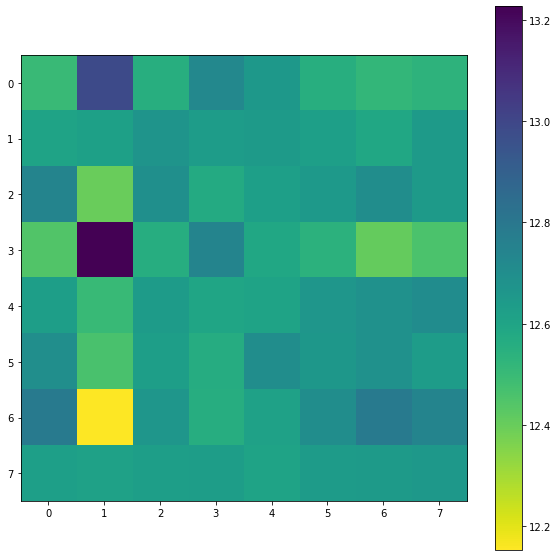

In [5]:
%matplotlib inline
plt.figure(figsize=(10,10))
plt.imshow(averages, cmap=plt.get_cmap("viridis_r"))
plt.xticks(range(n))
plt.yticks(range(n))
plt.colorbar()

In [6]:
optimal_value, optimal_assignment = solve_qap_backtracking(qap)

In [7]:
optimal_value

tensor(9.3004)

In [8]:
optimal_assignment

[7, 6, 4, 0, 2, 3, 1, 5]

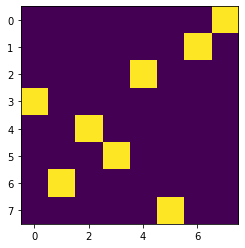

In [9]:
plt.imshow(np.eye(qap.size)[optimal_assignment])

In [10]:
qap.compute_value([7, 0, 3, 6, 5, 4, 1, 2])

tensor(9.7621)

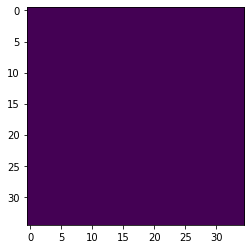

In [8]:
plt.imshow(qap.linear_costs)

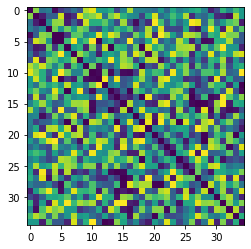

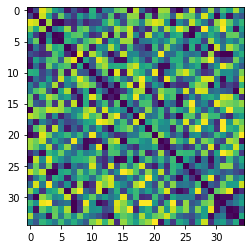

In [9]:
plt.imshow(qap.A)
plt.show()
plt.imshow(qap.B)
plt.show()

In [10]:
qap.A.sum(dim=1)

tensor([1599., 1737., 1705., 1690., 2029., 1710., 1736., 1978., 1817., 1785.,
        1841., 1516., 1819., 1544., 1533., 1566., 1441., 1705., 1666., 1795.,
        1495., 1847., 1685., 1765., 1651., 1955., 1417., 1569., 1618., 1669.,
        1882., 1967., 1653., 1736., 1493.])

In [11]:
qap.B.sum(dim=1)

tensor([1489., 1622., 1774., 1916., 1503., 1712., 1537., 1359., 1722., 1686.,
        1679., 1757., 1438., 1599., 1773., 1670., 2041., 1752., 1873., 1701.,
        1648., 1774., 1559., 1720., 1469., 1504., 1683., 1629., 1826., 1689.,
        1428., 1763., 1788., 1645., 1830.])

In [12]:
qap.A

tensor([[ 0., 81., 37.,  ..., 46., 68., 53.],
        [81.,  0.,  8.,  ...,  4., 88., 54.],
        [37.,  8.,  0.,  ..., 71., 78.,  8.],
        ...,
        [46.,  4., 71.,  ...,  0., 88., 13.],
        [68., 88., 78.,  ..., 88.,  0., 62.],
        [53., 54.,  8.,  ..., 13., 62.,  0.]])

In [13]:
import importlib
import drlqap.nn

In [14]:
importlib.reload(drlqap.nn)
drlqap.nn.edge_histogram_embeddings(qap.A, 8)

tensor([[[1, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 1, 0],
         [0, 0, 1,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 1, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 1, 0],
         [1, 0, 0,  ..., 0, 0, 0],
         [1, 0, 0,  ..., 0, 0, 0],
         ...,
         [1, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 1],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 1,  ..., 0, 0, 0],
         [1, 0, 0,  ..., 0, 0, 0],
         [1, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 1, 0, 0],
         [0, 0, 0,  ..., 0, 1, 0],
         [1, 0, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 0],
         [1, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 1, 0, 0],
         ...,
         [1, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 1],
         [0, 1, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 1, 0, 0],
         [0, 0, 0,  ..., 0, 0, 1],
         [0,